<a href="https://colab.research.google.com/github/Shahid-03/Shahid-03/blob/main/Copy_of_Walmart_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading

Importing the necessary libraries, like pandas, numpy and some plotting libraries such as matplotlib and seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Set the default font size, figure size and the grid in the plot

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Reading of data as a pandas dataframe and named as **df**

In [3]:
df = pd.read_csv('Walmart.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Walmart.csv'

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


**About Data:**
*   Store - the store number
*   Date - the week of sales
*   Weekly_Sales - sales for the given store
*   Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
*   Temperature - Temperature on the day of sale
*   Fuel_Price - Cost of fuel in the region
*   CPI – Prevailing consumer price index
*   Unemployment - Prevailing unemployment rate

**Insights:**

*   Here the target columns is Weekly_Sales.
*   The data is related to walmart store of united state of america. Where **Store**, **Holiday_Flag** are categorical in nature
*   The data is collected over a 45 stores and weekly sales gives the sales of the crossponding store.


## Data Exploration and Modification

In [ ]:
df.info() # it gives the information (like count and data type) of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Here Date columns is **object** and other remain columns are **interger or float** in nature. Now using the pandas I change the date column datatype(i.e. object) into a pandas-datetime.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

Using the date column i create three seperate columns of weekday, month and year and added to the existing dataset.

In [ ]:
df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

Now I drop the date columns because of no use of it.

In [ ]:
df.drop(['Date'], axis=1, inplace=True)

Hence the modified dataset is look like:

In [ ]:
df.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010


Explored the unique values of the weekday, month and year columns as follows:

In [ ]:
print('years unique value', df.year.unique())
print('months unique value', df.month.unique())
print('weekday unique value', df.weekday.unique())

years unique value [2010 2011 2012]
months unique value [ 2  3  4  5  6  7  8  9 10 11 12  1]
weekday unique value [4]


Months and weekday are as usual, but the data is taken from year 2010, 2011, 2012 only.

Now to get the idea of distribution of the dataset, I used describe function which gives a table of various statistical values of all the columns

In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,4.0,6.447552,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.0,3.238308,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,4.0,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.0,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.0,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.0,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,4.0,12.000000,2012.000000


**Insights:**
*   Temperature - has values ranges from (-2, 100.1) Fahrenhite.
*   CPI - is ranges from 126 to 227 with a standard deviation of 39.35
*   Unemployment - is ranges from 3.87 to 14.31 with a standard deviation of 1.87

In [ ]:
original_df = df.copy() # made the copy of dataframe to check the dublicates values in the dataset

Checking of dublicates values :

In [ ]:
counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('The dataset doesn\'t have any duplicates')
else:
    print('Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')

The dataset doesn't have any duplicates


Checking of missing values :

In [ ]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
weekday         0
month           0
year            0
dtype: int64

Dataset doesn't have null values

## Data Visualization

In [ ]:
df.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010


Here we have:

**Numerical columns:** Weekly_sales, temperature, fuel_price, cpi, unemployment

**Categorical columns:** Holiday_flag, Weekday, month, year

Now plotted the count plot to get the distribution or frequency of the columns

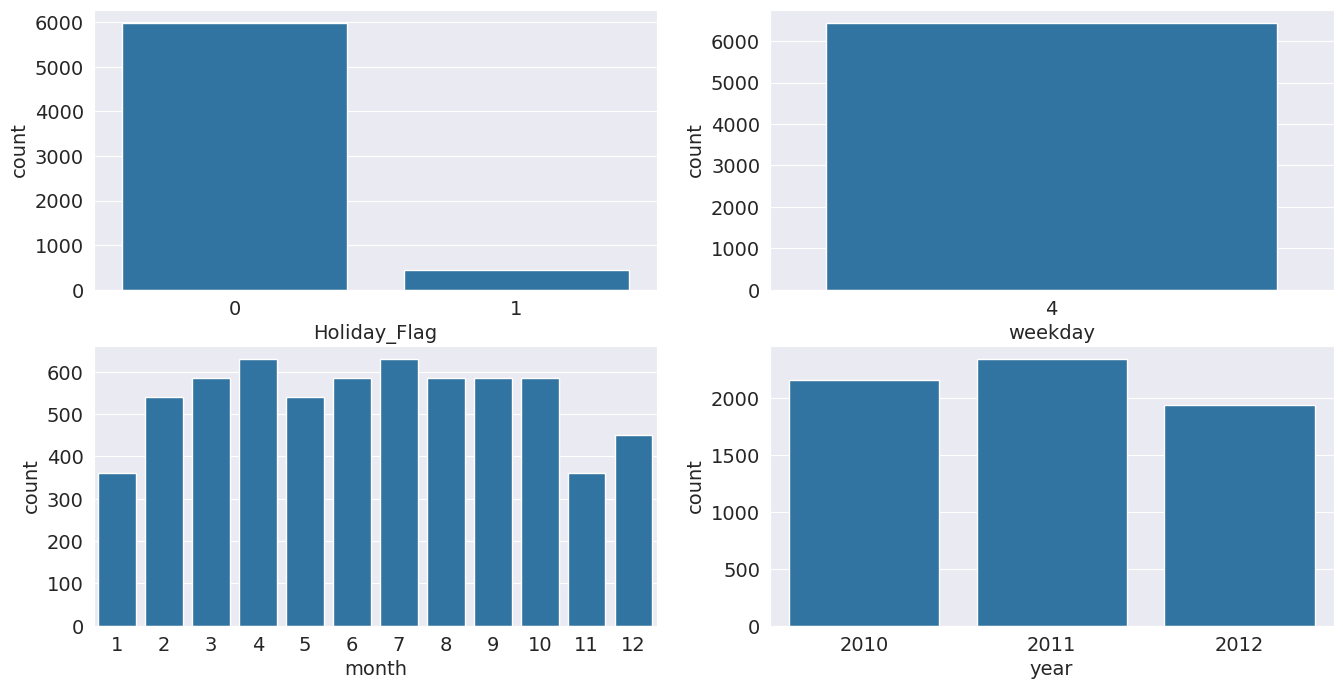

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

#axes[0,0].set_title('Holiday Count plot')
sns.countplot(x='Holiday_Flag', data=df, ax= axes[0,0])

#axes[0,1].set_title('Weekday Count plot')
sns.countplot(x='weekday', data=df, ax= axes[0,1]);

#axes[1,0].set_title('month Count plot')
sns.countplot(x='month', data=df, ax= axes[1,0]);

#axes[1,1].set_title('year Count plot')
sns.countplot(x='year', data=df, ax= axes[1,1]);

**Insights:**

*   In Holiday flag most of the time there is no holiday in that week.
*   In weekdays columns observations are mostly related to the day 4
*   Most of the observation in the data is from the month of april
*   Most of the observation in the data is from year 2011

To get the idea of how many observations are there in dataset crossponding to each store, I again plot a count plot.

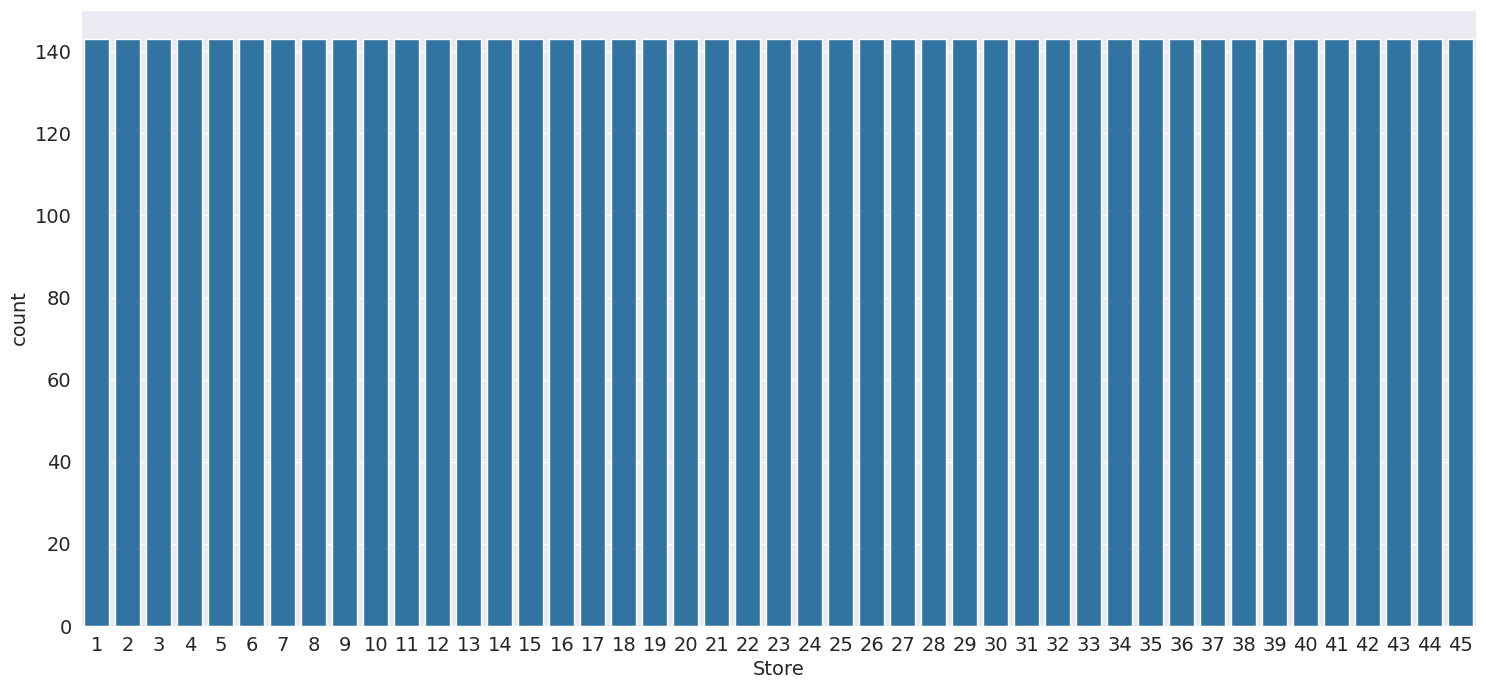

In [ ]:
plt.figure(figsize= (18,8))
sns.countplot(x= 'Store', data= df);
plt.show()

All the store have equal number of data in the set

In [ ]:
df.head(1)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.9,0,42.31,2.572,211.096358,8.106,6,5,2010


To analyze the distribution of the data, I plotted the histogram and boxplot for Temperature, Unemployment, Fuel_Price, CPI.

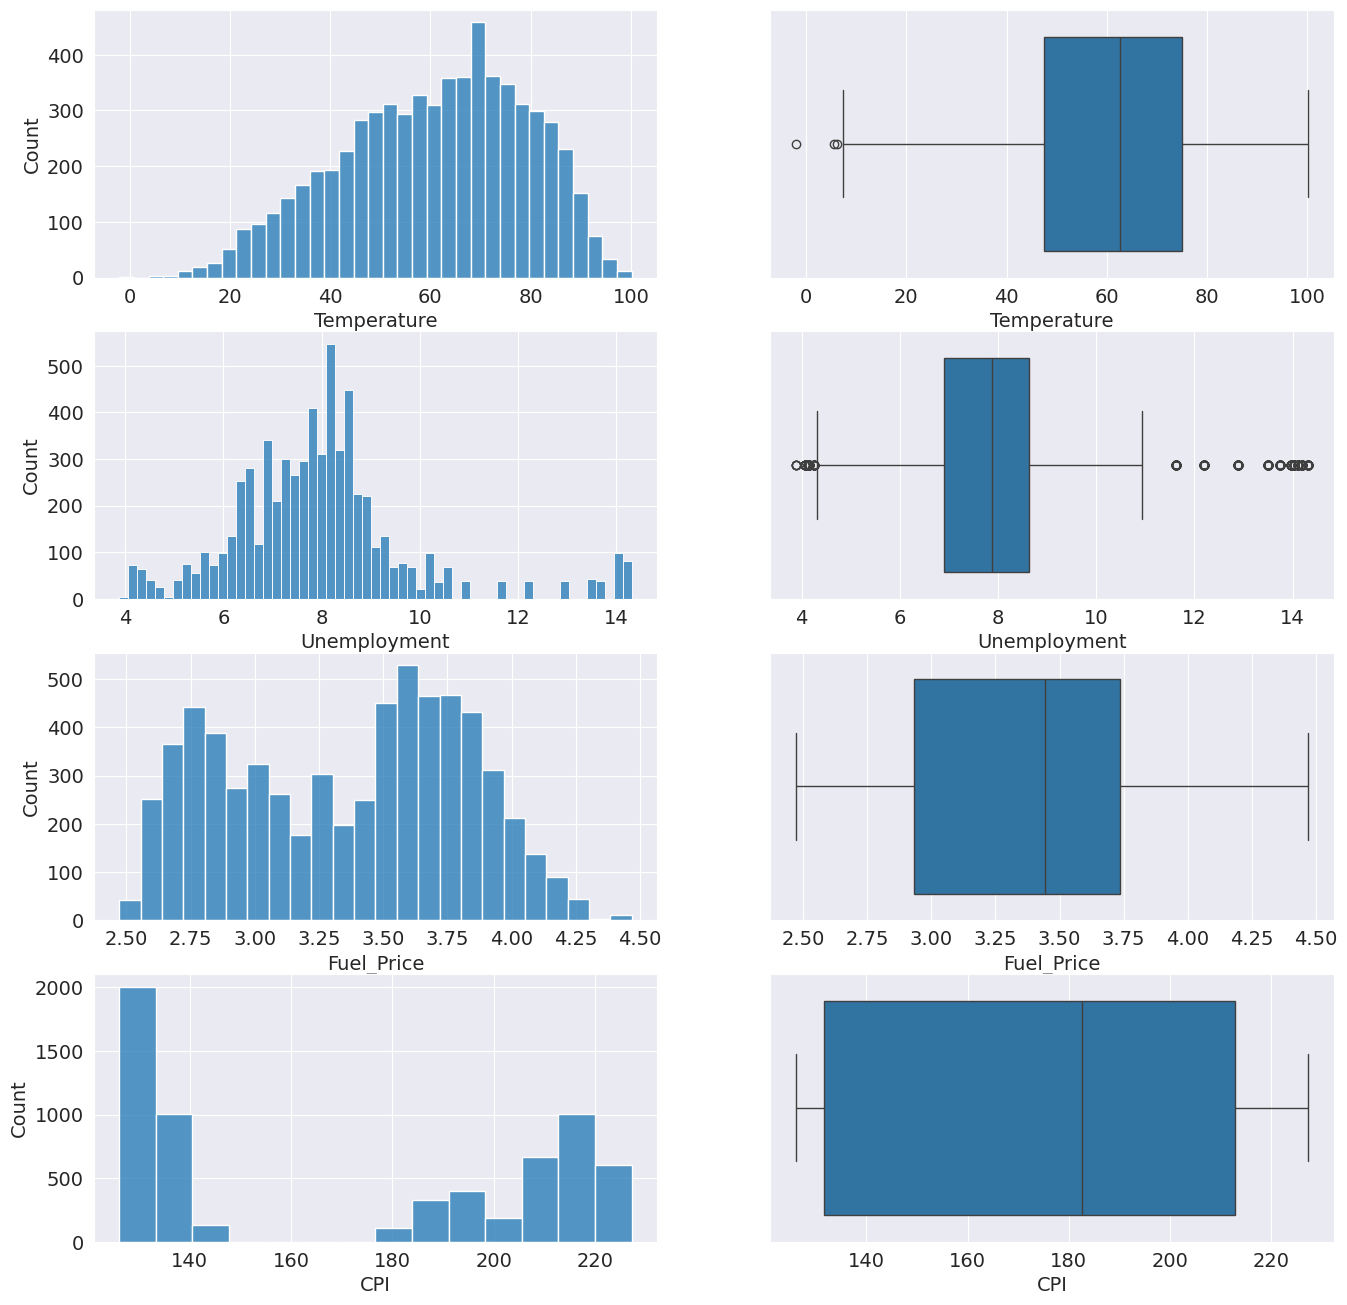

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
# axes[0,0].set_title('Temperature')
sns.histplot(x= 'Temperature', data= df, ax= axes[0,0])

sns.boxplot(x= 'Temperature', data= df, ax= axes[0,1])

# axes[1,0].set_title('Unemployment')
sns.histplot(x= 'Unemployment', data= df, ax= axes[1,0])

sns.boxplot(x= 'Unemployment', data= df, ax= axes[1,1])

# axes[2,0].set_title('Fuel_Price')
sns.histplot(x= 'Fuel_Price', data= df, ax= axes[2,0])

sns.boxplot(x = 'Fuel_Price', data= df, ax= axes[2,1])

# axes[3,0].set_title('CPI')
sns.histplot(x= 'CPI', data= df, ax= axes[3,0])

sns.boxplot(x= 'CPI', data= df, ax= axes[3,1]);

**Insights:**

*   Temperature:  Crossponding to the lower temperature, there is a presence of outlier.
*   Umemployment: The outlier is present in the dataset crossponding to higher and lower both values.
*   CPI: It is either very low or very high.

In [ ]:
# Removing the outlier from Temperature column

Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1
df = df[df['Temperature'] <= (Q3+(1.5*IQR))]
df = df[df['Temperature'] >= (Q1-(1.5*IQR))]

In [ ]:
# Removing the outlier from Unemployment column

Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR = Q3 - Q1
df = df[df['Unemployment'] <= (Q3+(1.5*IQR))]
df = df[df['Unemployment'] >= (Q1-(1.5*IQR))]

In [ ]:
df.shape

(5951, 10)

On the process of removing outlier, **484 data** points are removed from data-set

## Encoding

Encoding is a process to convert the categorical columns into a numerical columns, as it is not a good preactice to train a model with categorical inputs.

In [ ]:
cat_cols = ['Store', 'Holiday_Flag', 'weekday', 'month', 'year'] # these are the categorical columns

In [ ]:
df[cat_cols].nunique() # Counting the unique value in each of the categorical columns.

Store           45
Holiday_Flag     2
weekday          1
month           12
year             3
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Creating an object of the encoder function
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder object to the dataset you want to convert into numerical form.
encoder.fit(df[cat_cols])


OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
# Creating a list of the encoded columns
encoded_cols = list(encoder.get_feature_names_out(cat_cols))
print(encoded_cols)


['Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Holiday_Flag_0', 'Holiday_Flag_1', 'weekday_4', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'year_2010', 'year_2011', 'year_2012']


In [ ]:
# Now i added those encoded columns into the original dataset by transforming it into a categorical form.
df[encoded_cols] = encoder.transform(df[cat_cols])

In [ ]:
df.shape

(6435, 73)

## Standardization

To scale all the column values to specific range of 0 - 1, I used standard scaler function. It is important to give the equal weights to all the columns.

In [ ]:
# Importing a MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Creating Scaler Object
scaler = MinMaxScaler()
# Fitted the scaler to the dataset
scaler.fit(df)
# Transformed the dataset using the fitted scaler object
scaled_df = scaler.transform(df)

In [ ]:
# Converting the output scaled dataframe into a pandas dataframe
scaled_df = pd.DataFrame(data = scaled_df, columns = df.columns)

In [ ]:
# Checking the output dataframe
scaled_df.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2010,year_2011,year_2012
0,0.0,0.397291,0.0,0.434149,0.050100,0.840500,0.405118,0.0,0.090909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.396811,1.0,0.396967,0.038076,0.841941,0.405118,0.0,0.090909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.388501,0.0,0.410861,0.021042,0.842405,0.405118,0.0,0.090909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Train-Test-Split

Split the dataset into the two part:
1. Training dataset (used to train the model)
2. Testing dataset (used to test the model)

In [ ]:
# Drop the sales columns to get the input  features
X = scaled_df.drop('Weekly_Sales', axis=1)
# Use the sales column as a target columns
y = scaled_df['Weekly_Sales']

In [ ]:
# Importing train test split
from sklearn.model_selection import train_test_split
# dividing the dataset into the train and the test parts and each part has input feature and target features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
# Printin the shape of all the dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5148, 72), (1287, 72), (5148,), (1287,))

## Feature Selection

Out of all the 78 features all are not important and we have to choose the important feature out of all the features

In [ ]:
# import a linear regerssion model
from sklearn.linear_model import LinearRegression
# import a Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
# import a mean squared error for model evaluation
from sklearn.metrics import mean_squared_error
# import a r2 score for model evaluation
from sklearn.metrics import r2_score
# import a RFE model for feature selection
from sklearn.feature_selection import RFE

In [ ]:
# Creatint a list to store training and test error
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in range(m):
    # creating a linear regression model object
    lm = LinearRegression()
    # creating a rfe model object with linear regression model and with a parameter of the number of features
    rfe = RFE(lm, n_features_to_select=X_train.shape[1]-i)
    # fitting the rfe model to the trainig dataset
    rfe = rfe.fit(X_train, y_train)
    # creating a linear regression model object for prediction
    LR = LinearRegression()
    # fitted the lr model using the selected features
    LR.fit(X_train.loc[:,rfe.support_], y_train)
    # Made the prediction using the linear regression model
    pred1 = LR.predict(X_train.loc[:,rfe.support_]) # make the prediction on the trainig dataset
    pred2 = LR.predict(X_test.loc[:,rfe.support_]) # make the prediction on the test dataset
    # Insert the mse into the Trr and Tss for train and test respectively
    Trr.append(np.sqrt(mean_squared_error(y_train, pred1)))
    Tss.append(np.sqrt(mean_squared_error(y_test, pred2)))

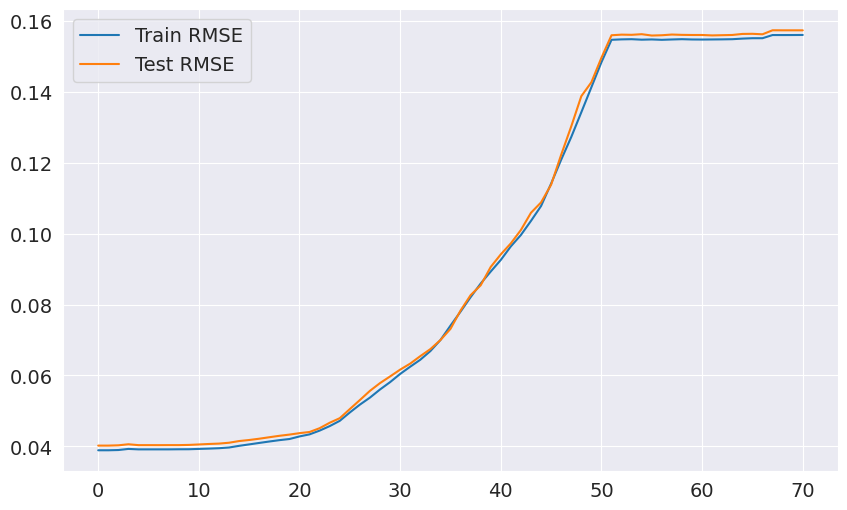

In [ ]:
plt.plot(Trr, label= 'Train RMSE')
plt.plot(Tss, label= 'Test RMSE')
plt.legend()
plt.show()

If we Recursively Eleminate at most **Ten** features then the score is maximum.

In [ ]:
# Eleminating 10 features and using Linear Regresion model the error printed as follows which is the best possible score.

# creating a linear regression model object
lm = LinearRegression()
# creating a rfe model object with linear regression model and with number of features equal to 10.
rfe = RFE(lm,n_features_to_select=X_train.shape[1]-9)
# fitting the rfe model to the trainig dataset
rfe = rfe.fit(X_train, y_train)
# creating a linear regression model object for prediction
LR = LinearRegression()
# fitted the lr model using the selected features
LR.fit(X_train.loc[:,rfe.support_], y_train)
# Made the prediction using the linear regression model
pred1 = LR.predict(X_train.loc[:,rfe.support_])
pred2 = LR.predict(X_test.loc[:,rfe.support_])
# Printing the results as a MSE and r2_score.
print("MSE train",np.sqrt(mean_squared_error(y_train, pred1)))
print("MSE test",np.sqrt(mean_squared_error(y_test, pred2)))
print("r2_score train - {}".format(r2_score(y_train, pred1)))
print("r2_score test - {}".format(r2_score(y_test, pred2)))

MSE train 0.04243603186769974
MSE test 0.04791984371575972
r2_score train - 0.9271263529667152
r2_score test - 0.9145618268479702


Now Removing the 10 features and create the New training and test dataset

In [ ]:
X_train = X_train.loc[:,rfe.support_]
X_test = X_test.loc[:,rfe.support_]

Now onwards I am going to use various models

## Linear Regression

In [ ]:
lr =LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_train)
pred2 = lr.predict(X_test)

print("Root Mean Squared Error train {}".format(np.mean(mean_squared_error(y_train, pred1))))
print("Root Mean Squared Error test {}".format(np.sqrt(mean_squared_error(y_test, pred2))))
print("r2_score train {}".format(r2_score(y_train, pred1)))
print("r2_score test {}".format(r2_score(y_test, pred2)))

Root Mean Squared Error train 0.0018008168006764275
Root Mean Squared Error test 0.04791984371575972
r2_score train 0.9271263529667152
r2_score test 0.9145618268479702


**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
rr = Ridge()
rr.fit(X_train, y_train)
predrr1 = rr.predict(X_train)
predrr2 = rr.predict(X_test)
print("Root Mean Squared Error train {}".format(np.mean(mean_squared_error(y_train, predrr1))))
print("Root Mean Squared Error test {}".format(np.sqrt(mean_squared_error(y_test, predrr2))))
print("r2_score train {}".format(r2_score(y_train, predrr1)))
print("r2_score test {}".format(r2_score(y_test, predrr2)))

Root Mean Squared Error train 0.0038368608968116598
Root Mean Squared Error test 0.06639984372905695
r2_score train 0.8447337638092676
r2_score test 0.8359579143943617


**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lr = Lasso()
lr.fit(X_train, y_train)
predlr1 = lr.predict(X_train)
predlr2 = lr.predict(X_test)
print("Root Mean Squared Error train {}".format(np.mean(mean_squared_error(y_train, predlr1))))
print("Root Mean Squared Error test {}".format(np.sqrt(mean_squared_error(y_test, predlr2))))
print("r2_score train {}".format(r2_score(y_train, predlr1)))
print("r2_score test {}".format(r2_score(y_test, predlr2)))

Root Mean Squared Error train 0.024711495499242828
Root Mean Squared Error test 0.16395383804559885
r2_score train 0.0
r2_score test -0.00014816618161050954


**ElasticNet Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train, y_train)
predlr1 = en.predict(X_train)
predlr2 = en.predict(X_test)
print("Root Mean Squared Error train {}".format(np.mean(mean_squared_error(y_train, predlr1))))
print("Root Mean Squared Error test {}".format(np.sqrt(mean_squared_error(y_test, predlr2))))
print("r2_score train {}".format(r2_score(y_train, predlr1)))
print("r2_score test {}".format(r2_score(y_test, predlr2)))

Root Mean Squared Error train 0.024711495499242828
Root Mean Squared Error test 0.16395383804559885
r2_score train 0.0
r2_score test -0.00014816618161050954


**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
Trr = []
Tss = []
for i in range(2,4):
  poly_reg = PolynomialFeatures(degree = i)
  pl_X_train = poly_reg.fit_transform(X_train)
  pl_X_test = poly_reg.fit_transform(X_test)
  lr = LinearRegression()
  lr.fit(pl_X_train, y_train)
  pred_poly_train = lr.predict(pl_X_train)
  Trr.append(np.sqrt(mean_squared_error(y_train, pred_poly_train)))
  pred_poly_test = lr.predict(pl_X_test)
  Tss.append(np.sqrt(mean_squared_error(y_test, pred_poly_test)))

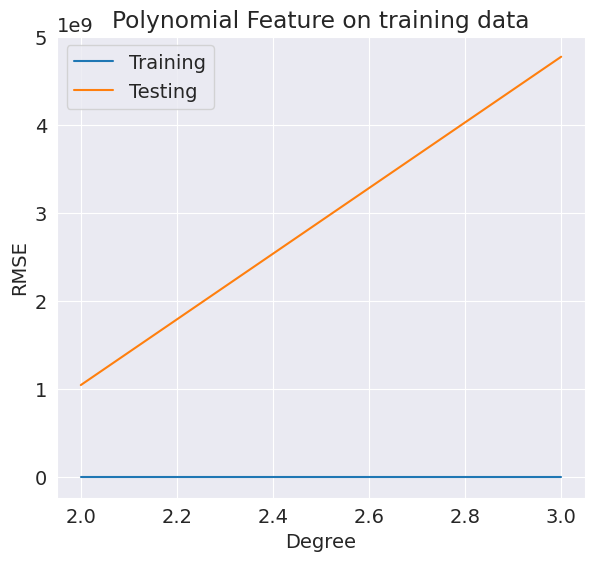

In [ ]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,4), Trr, label= 'Training')
plt.plot(range(2,4), Tss, label= 'Testing')
plt.title('Polynomial Feature on training data')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()

It is clear that in between 2-4 degree polynomial regression 2 has Bais-variance tradeoff

In [ ]:
poly_reg = PolynomialFeatures(degree = 2)
pl_X_train = poly_reg.fit_transform(X_train)
pl_X_test = poly_reg.fit_transform(X_test)
lr = LinearRegression()
lr.fit(pl_X_train, y_train)
pred_poly_train = lr.predict(pl_X_train)
print("r2_score train {}".format(r2_score(pred_poly_train, y_train)))
pred_poly_test = lr.predict(pl_X_test)
print("r2_score test {}".format(r2_score(pred_poly_test, y_test)))
print("Root Mean Squared Error train {}".format(np.mean(mean_squared_error(y_train, pred_poly_train))))
print("Root Mean Squared Error test {}".format(np.sqrt(mean_squared_error(y_test, pred_poly_test))))

r2_score train 0.9633763748240769
r2_score test -0.00017939883060535955
Root Mean Squared Error train 0.0008736104482567479
Root Mean Squared Error test 1042034507.0347103


In [ ]:
#creating a tabel
tabel = {
        'Train R2': [0.9324387485162124, 0.9323641360074176, 0.0, 0.0, 0.9563932198334125],
        'Test R2' : [0.9223162582948724, 0.9219331606995953, -0.00014816618161050954, -0.00014816618161050954, -0.0005599911350040454],
        'Train RMSE' : [0.0016695395619648289, 0.0016713833486400986, 0.024711495499242828, 0.024711495499242828, 0.0010346077251656776 ],
        'Test RMSE' : [0.04569350618906344, 0.04580603645234492, 0.16395383804559885, 0.16395383804559885, 730742413.004261 ]
        }

In [ ]:
df_new = pd.DataFrame(tabel)

In [ ]:
df_new.index = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'Polynomial Regression']

In [ ]:
df_new

,Train R2,Test R2,Train RMSE,Test RMSE
Linear Regression,0.932439,0.922316,0.001670,4.569351e-02
Ridge Regression,0.932364,0.921933,0.001671,4.580604e-02
Lasso Regression,0.000000,-0.000148,0.024711,1.639538e-01
ElasticNet Regression,0.000000,-0.000148,0.024711,1.639538e-01
Polynomial Regression,0.956393,-0.000560,0.001035,7.307424e+08


It is clear that Linear Regression is the Best Model in the dataset, with test accuracy of 92%(approx).

To improve the accuracy further we can apply other regressor i.e. Random Forest, G

Now I am going to imporve the accuracy till 98% - 99%. For this I have to use Decision Tree or Random Forest etc.

**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
pred_dt1 = dt.predict(X_train)
pred_dt2 = dt.predict(X_test)
print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_dt1))))
print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_dt2))))
print('Accuracy Score train: ', dt.score(X_train, y_train))
print('Accuracy Score test: ', dt.score(X_test, y_test))

RMSE for train 0.01802357243085737
RMSE for test 0.05481293667154066
Accuracy Score train:  0.9868543300756397
Accuracy Score test:  0.8882140276486229


In [ ]:
max_depth_range = np.arange(1,40,1)
for x in max_depth_range:
  dt = DecisionTreeRegressor(max_depth= x)
  dt.fit(X_train, y_train)
  pred_dt1 = dt.predict(X_train)
  pred_dt2 = dt.predict(X_test)
  print('for max_depth: ', x)
  print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_dt1))))
  print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_dt2))))
  print('Accuracy Score train: ', dt.score(X_train, y_train))
  print('Accuracy Score test: ', dt.score(X_test, y_test))
  print()

for max_depth:  1
RMSE for train 0.14630036809978922
RMSE for test 0.15020170495804028
Accuracy Score train:  0.13385259476547484
Accuracy Score test:  0.1605962742459327

for max_depth:  2
RMSE for train 0.13756312301674492
RMSE for test 0.14225930066097306
Accuracy Score train:  0.23421822792149827
Accuracy Score test:  0.24702162028517993

for max_depth:  3
RMSE for train 0.12930158094623695
RMSE for test 0.13295259516000377
Accuracy Score train:  0.3234363806225916
Accuracy Score test:  0.34231974203242266

for max_depth:  4
RMSE for train 0.11809303498810032
RMSE for test 0.12344420526422556
Accuracy Score train:  0.4356486877482588
Accuracy Score test:  0.43302673103010636

for max_depth:  5
RMSE for train 0.10686609832901496
RMSE for test 0.11269968000222162
Accuracy Score train:  0.5378522124483878
Accuracy Score test:  0.527429580515037

for max_depth:  6
RMSE for train 0.09065577119523668
RMSE for test 0.09698032530365648
Accuracy Score train:  0.6674232503955528
Accuracy Sco

Decision Tree has maximum accuracy at **maximum depth 39**

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
pred_rfc1 = rfc.predict(X_train)
pred_rfc2 = rfc.predict(X_test)
print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_rfc1))))
print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_rfc2))))
print('Accuracy Score train: ', dt.score(X_train, y_train))
print('Accuracy Score test: ', dt.score(X_test, y_test))

RMSE for train 0.021510055827571817
RMSE for test 0.04572824368006982
Accuracy Score train:  0.9868543300756397
Accuracy Score test:  0.8896127542619786


In [ ]:
max_depth_range = np.arange(1,40,1)
for x in max_depth_range:
  dt = RandomForestRegressor(max_depth= x)
  dt.fit(X_train, y_train)
  pred_xg1 = dt.predict(X_train)
  pred_xg2 = dt.predict(X_test)
  print('for max_depth: ', x)
  print('for max_depth: ', x)
  print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_xg1))))
  print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_xg2))))
  print('Accuracy Score train: ', dt.score(X_train, y_train))
  print('Accuracy Score test: ', dt.score(X_test, y_test))
  print()

for max_depth:  1
for max_depth:  1
RMSE for train 0.1463005482733904
RMSE for test 0.1501969666012834
Accuracy Score train:  0.13385046138747614
Accuracy Score test:  0.16064923411852672

for max_depth:  2
for max_depth:  2
RMSE for train 0.1354567195663031
RMSE for test 0.1397704368768801
Accuracy Score train:  0.2574903904044864
Accuracy Score test:  0.2731382540625854

for max_depth:  3
for max_depth:  3
RMSE for train 0.12469351961717055
RMSE for test 0.12739295208725326
Accuracy Score train:  0.37079996493963274
Accuracy Score test:  0.3961737751182496

for max_depth:  4
for max_depth:  4
RMSE for train 0.11283893117962607
RMSE for test 0.1161954751748312
Accuracy Score train:  0.48474893435120026
Accuracy Score test:  0.49765787281465135

for max_depth:  5
for max_depth:  5
RMSE for train 0.09878355060016915
RMSE for test 0.10293964403821267
Accuracy Score train:  0.6051153654591575
Accuracy Score test:  0.6057365735353738

for max_depth:  6
for max_depth:  6
RMSE for train 0.08

In the depth of **36** the** Random Forest Regressor** has its maximum value of accuracy.

In [ ]:
rfc = RandomForestRegressor(max_depth = 36)
rfc.fit(X_train, y_train)
pred_rfc1 = rfc.predict(X_train)
pred_rfc2 = rfc.predict(X_test)
print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_rfc1))))
print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_rfc2))))
print('Accuracy Score train: ', rfc.score(X_train, y_train))
print('Accuracy Score test: ', rfc.score(X_test, y_test))

RMSE for train 0.02144514964744633
RMSE for test 0.04553881753382131
Accuracy Score train:  0.9813894532034511
Accuracy Score test:  0.9228413417911556


**XG Boost Regressor**

In [ ]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred_xg1 = xg.predict(X_train)
pred_xg2 = xg.predict(X_test)
print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_xg1))))
print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_xg2))))

RMSE for train 0.02275877884088774
RMSE for test 0.03796389440340333


In [ ]:
max_depth_range = np.arange(1,15,1)
for x in max_depth_range:
  dt = XGBRegressor(max_depth= x)
  dt.fit(X_train, y_train)
  pred_xg1 = dt.predict(X_train)
  pred_xg2 = dt.predict(X_test)
  print('for max_depth: ', x)
  print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_xg1))))
  print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_xg2))))
  print('Accuracy Score train: ', dt.score(X_train, y_train))
  print('Accuracy Score test: ', dt.score(X_test, y_test))
  print()

for max_depth:  1
RMSE for train 0.07233129347962147
RMSE for test 0.07666366874137946
Accuracy Score train:  0.7882841199717987
Accuracy Score test:  0.7813243808481946

for max_depth:  2
RMSE for train 0.040743310116796
RMSE for test 0.046987288477596895
Accuracy Score train:  0.9328240850771546
Accuracy Score test:  0.9178548484833516

for max_depth:  3
RMSE for train 0.03554990408906868
RMSE for test 0.04542902830979438
Accuracy Score train:  0.9488579847067247
Accuracy Score test:  0.9232129358774241

for max_depth:  4
RMSE for train 0.02849241138915249
RMSE for test 0.03871154413457969
Accuracy Score train:  0.9671481838566355
Accuracy Score test:  0.9442426457936139

for max_depth:  5
RMSE for train 0.02506476822216475
RMSE for test 0.03759780664876914
Accuracy Score train:  0.9745769087083341
Accuracy Score test:  0.9474047906701517

for max_depth:  6
RMSE for train 0.02275877884088774
RMSE for test 0.03796389440340333
Accuracy Score train:  0.9790396330183938
Accuracy Score te

It means **maximun depth 9** has best value of Accuracy

In [ ]:
xg = XGBRegressor(max_depth = 9)
xg.fit(X_train, y_train)
pred_xg1 = xg.predict(X_train)
pred_xg2 = xg.predict(X_test)
print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_xg1))))
print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_xg2))))
print('Accuracy Score train: ', xg.score(X_train, y_train))
print('Accuracy Score test: ', xg.score(X_test, y_test))

RMSE for train 0.018510957103017586
RMSE for test 0.04205130061211277
Accuracy Score train:  0.9861337597766895
Accuracy Score test:  0.934206947964215


In [ ]:
tabel1 = {
        'Train Score': [0.9679040861170889, 0.9637587048322853, 0.9601543222728802],
        'Test Score' : [0.8808466556220073, 0.9028060343874318, 0.9115195955339979],
        'Train RMSE' : [0.02816270639447925, 0.02992618589836856, 0.03137907401148098],
        'Test RMSE' :  [0.05659037012899937, 0.051110374979016944, 0.04876553192516943]
        }

In [ ]:
df1 = pd.DataFrame(tabel1)

In [ ]:
df1

,Train Score,Test Score,Train RMSE,Test RMSE
0,0.967904,0.880847,0.028163,0.056590
1,0.963759,0.902806,0.029926,0.051110
2,0.960154,0.911520,0.031379,0.048766


In [ ]:
df1.index = ['Decision Tree', 'Random Forest', 'XGBoost']

In [ ]:
df1

,Train Score,Test Score,Train RMSE,Test RMSE
Decision Tree,0.967904,0.880847,0.028163,0.056590
Random Forest,0.963759,0.902806,0.029926,0.051110
XGBoost,0.960154,0.911520,0.031379,0.048766


Among the method XGBoost is the best method for the data set

By Comparising the Linear and XGBoost we can conclude that linear Regression the best suited for the above data set